In [1]:
import pandas as pd 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime
import random
import os

In [2]:
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/um_volcano_project/GALAPAGOS_DATA'

In [3]:
# Import tables
eruptions = pd.read_csv(os.path.join(folder_path, "eruptions_galapagos3.csv"))
average_galapagos = pd.read_csv(os.path.join(folder_path, "average_galapagos.csv"))
climate_bellavista = pd.read_csv(os.path.join(folder_path,"climate_bellavista.csv"))

In [4]:
def date_to_decimal_year(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    year = date_obj.year
    day_of_year = date_obj.timetuple().tm_yday
    decimal_year = year + (day_of_year - 1) / 365.0
    decimal_year = round(decimal_year,4) 
    return decimal_year

In [6]:
def accuracies(rolling_numbers, percents):
        rolling_galapagos = average_galapagos.copy()
        rain_start = '11-01'
        rain_end = '10-31'
        erupt_dates = eruptions['Start'][eruptions['Start'] >= '2004-11-01']
        predictions = []
        
        for i in rolling_numbers:
                
                rolling_galapagos['roll' + str(i)] = average_galapagos.Precipitation.rolling(i).mean()
                rolling_galapagos = rolling_galapagos.dropna()
                
                for j in percents:
                        
                        season_length = int((j * 365) / 100)
                        rainy_dates = pd.DataFrame()
                        
                        for k in range(18):
                                year = 2004 + k
                                yearly_rain = rolling_galapagos[(rolling_galapagos['Date'] >= str(year) + '-' + rain_start) & (rolling_galapagos['Date'] <= str(year + 1) + '-' + rain_end)].sort_values(by=['roll' + str(i)])
                                rainy_dates = rainy_dates.append(yearly_rain[-(season_length+1):-1])

                        rain_erup_freq = 0
                        for l in erupt_dates:
                                if l in np.array(rainy_dates['Date']):
                                        rain_erup_freq += 1

                        predictions.append([i, j, rain_erup_freq / len(erupt_dates)])

        return predictions


In [73]:
# # Creates the blank csv file

# csv_file_name = 'eruption_accuracies.csv'
# #Fix this so that it doesnt overwrite the header

# column_names = ['Rolling sums (days)', 'Rainy season (fraction of year)', 'Fraction of eruptions in rainy season', 'Prediction improvement']

# # Open the CSV file in write mode ('w', 'wb', or 'w+', depending on your Python version).
# with open(csv_file_name, mode='w', newline='') as csv_file:
#     # Create a DictWriter object with the column names.
#     csv_writer = csv.DictWriter(csv_file, fieldnames=column_names)

#     # Write the header (column names) to the CSV file.
#     csv_writer.writeheader()

In [7]:
# # Fills the blank csv file

# # Choose rolling number and length of rainy season
# rolling_numbers = [30, 60, 90, 120]
# percents = [5, 10, 15, 20, 25, 30]

# predictions = accuracies(rolling_numbers, percents)

# for i in predictions:
#     with open('eruption_accuracies.csv', mode='a', newline='') as main:
#         csv_writer = csv.writer(main)
#         csv_writer.writerow([i[0], i[1]/100, round(i[2],2), round(100*((100*i[2])-i[1])/i[1],2)])



# # x = [i[0] for i in predictions]
# # y = [i[1] for i in predictions]

# # fig = plt.figure(figsize=(8,6))
# # ax = fig.add_subplot(111)

# # plt.scatter(x, y, c='green', s=300)

# # plt.show()

In [11]:
print(rolling_galapagos)

            Date  Precipitation    roll90
89    2000-08-29       0.000084  0.035789
90    2000-08-30       0.000459  0.028292
91    2000-08-31       0.016051  0.024638
92    2000-09-01       0.004335  0.023914
93    2000-09-02       0.016107  0.024082
...          ...            ...       ...
8357  2022-09-26       0.253598  0.189365
8358  2022-09-27       0.207847  0.190993
8359  2022-09-28       0.102879  0.191821
8360  2022-09-29       0.253887  0.194383
8361  2022-09-30       0.123092  0.195544

[8273 rows x 3 columns]


5


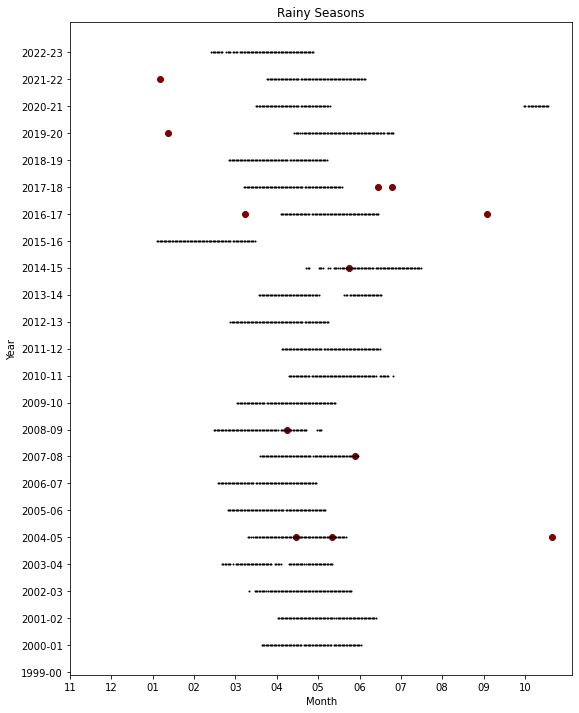

In [36]:
# Generates the rainy season plot
volcanos = {'Fernandina': 'Fe', 'Azul, Cerro': 'CA', 'Negra, Sierra': 'SN', 'Wolf': 'Wo'}

rolling_galapagos = average_galapagos.copy()
rain_start = '11-01'
rain_end = '10-31'
rolling_galapagos['roll90'] = average_galapagos.Precipitation.rolling(90).mean()
rolling_galapagos = rolling_galapagos.dropna()
rolling_galapagos['Decimal'] = rolling_galapagos.Date.apply(date_to_decimal_year)

plt.figure(figsize=(9,12))

erupt_dates = eruptions['Start'][eruptions['Start'] >= '2004-11-01']
decimal_erupts = np.array(erupt_dates.apply(date_to_decimal_year))
volc_x = [((i + (2/12)) % 1) for i in decimal_erupts]
volc_y = [(i + (2/12)) // 1 for i in decimal_erupts]
labels = list(eruptions['Volcano'][eruptions['Start'] >= '2004-11-01'])
plt.scatter(volc_x, volc_y, color='maroon')
for i in range(len(x)):
    plt.annotate(volcanos[labels[i]], (volc_x[i], volc_y[i]), textcoords="offset points", xytext=(0,10), ha='center')

count = 0
for k in range(24):
        year = 2000 + k
        yearly_rain = rolling_galapagos[(rolling_galapagos['Date'] >= str(year) + '-' + rain_start) & (rolling_galapagos['Date'] <= str(year + 1) + '-' + rain_end)].sort_values(by=['roll90'])
        rainy_season = yearly_rain[-73:-1].sort_values(by=['Date'])
        # if k == 20:
        #         x = np.array((rainy_season['Date'][rainy_season['Date'] < '2021-10-01'].apply(date_to_decimal_year) + (2/12)) % 1)
        #         y = np.array((rainy_season['Date'][rainy_season['Date'] < '2021-10-01'].apply(date_to_decimal_year) + (2/12)) // 1)
        #         plt.plot(x, y, color='black')

        #         x = np.array((rainy_season['Date'][rainy_season['Date'] > '2021-10-01'].apply(date_to_decimal_year) + (2/12)) % 1)
        #         y = np.array((rainy_season['Date'][rainy_season['Date'] > '2021-10-01'].apply(date_to_decimal_year) + (2/12)) // 1)
        #         plt.plot(x, y, color='black')
                
        # else:
        x = np.array((rainy_season['Date'].apply(date_to_decimal_year) + (2/12)) % 1)
        y = np.array((rainy_season['Date'].apply(date_to_decimal_year) + (2/12)) // 1)
        plt.scatter(x, y, color='black', s =1)
        for i in np.array(erupt_dates):
                if i in np.array(rainy_season['Date']):
                        count += 1
print(count)


plt.yticks([2000+k for k in range(24)], [str(1999+k) + '-' + str(2000+k)[2:4] for k in range(24)])
plt.xticks([(1/12)*k for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])
plt.xlabel("Month") 
plt.ylabel("Year") 
plt.title('Rainy Seasons') 
plt.show() 

In [22]:
print(rolling_galapagos)

            Date  Precipitation    roll90    Decimal    Year     Day
89    2000-08-29       0.000084  0.035789  2000.6603  2000.0  0.6603
90    2000-08-30       0.000459  0.028292  2000.6630  2000.0  0.6630
91    2000-08-31       0.016051  0.024638  2000.6658  2000.0  0.6658
92    2000-09-01       0.004335  0.023914  2000.6685  2000.0  0.6685
93    2000-09-02       0.016107  0.024082  2000.6712  2000.0  0.6712
...          ...            ...       ...        ...     ...     ...
8357  2022-09-26       0.253598  0.189365  2022.7342  2022.0  0.7342
8358  2022-09-27       0.207847  0.190993  2022.7370  2022.0  0.7370
8359  2022-09-28       0.102879  0.191821  2022.7397  2022.0  0.7397
8360  2022-09-29       0.253887  0.194383  2022.7425  2022.0  0.7425
8361  2022-09-30       0.123092  0.195544  2022.7452  2022.0  0.7452

[8273 rows x 6 columns]


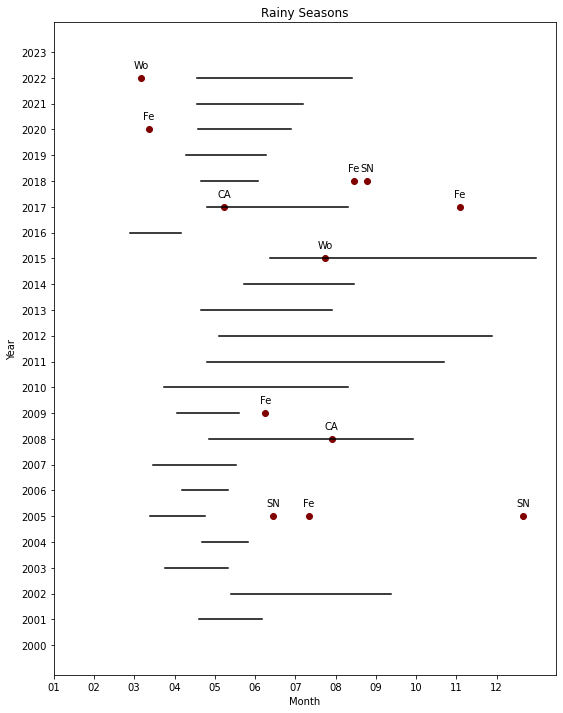

In [26]:
# Generates the rainy season plot
volcanos = {'Fernandina': 'Fe', 'Azul, Cerro': 'CA', 'Negra, Sierra': 'SN', 'Wolf': 'Wo'}

rolling_galapagos = average_galapagos.copy()
rolling_galapagos['roll90'] = average_galapagos.Precipitation.rolling(90).mean()
rolling_galapagos = rolling_galapagos.dropna()
rolling_galapagos['Decimal'] = rolling_galapagos.Date.apply(date_to_decimal_year)
rolling_galapagos['Year'] = rolling_galapagos['Decimal'] // 1
rolling_galapagos['Day'] = rolling_galapagos['Decimal'] % 1

plt.figure(figsize=(9,12))

erupt_dates = eruptions['Start'][eruptions['Start'] >= '2004-11-01']
decimal_erupts = np.array(erupt_dates.apply(date_to_decimal_year))
x = [((i + (2/12)) % 1) for i in decimal_erupts]
y = [(i + (2/12)) // 1 for i in decimal_erupts]
labels = list(eruptions['Volcano'][eruptions['Start'] >= '2004-11-01'])
plt.scatter(x, y, color='maroon')
for i in range(len(x)):
    plt.annotate(volcanos[labels[i]], (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

rain_by_year = []
for k in range(24):
        year = 2000 + k
        rain_by_year.append(rolling_galapagos['Precipitation'][rolling_galapagos['Year'] == year].sum()) 
mean_current = sum(rain_by_year[1:]) / (len(rain_by_year)-1)
mean_prev = sum(rain_by_year[0:-1]) / (len(rain_by_year)-1)

for k in range(24):
        year = 2000 + k
        yearly_rain = rolling_galapagos[rolling_galapagos['Year'] == year]
        if k == 0:
            length = .25
        else:
            #.15 and .10 add up to a .25 long rainy season, where we are scaling by how much stronger this year is than average. look back at ipad
            length = ((rain_by_year[k] / mean_current) * .25) + ((rain_by_year[k-1] / mean_prev) * 0)
        max_rain = yearly_rain['roll90'].max()
        season_mid = float(yearly_rain['Day'][yearly_rain['roll90'] == max_rain])
        rainy_season = yearly_rain[(yearly_rain['Day'] >= season_mid) & (yearly_rain['Day'] <= season_mid + length)].sort_values(by=['Day'])
        x = np.array(rainy_season['Day'])
        y = np.array(rainy_season['Year'])
        plt.plot(x, y, color='black')

plt.yticks([2000+k for k in range(24)])
plt.xticks([(1/12)*k for k in range(12)], ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])
plt.xlabel("Month") 
plt.ylabel("Year") 
plt.title('Rainy Seasons') 
plt.show() 

4


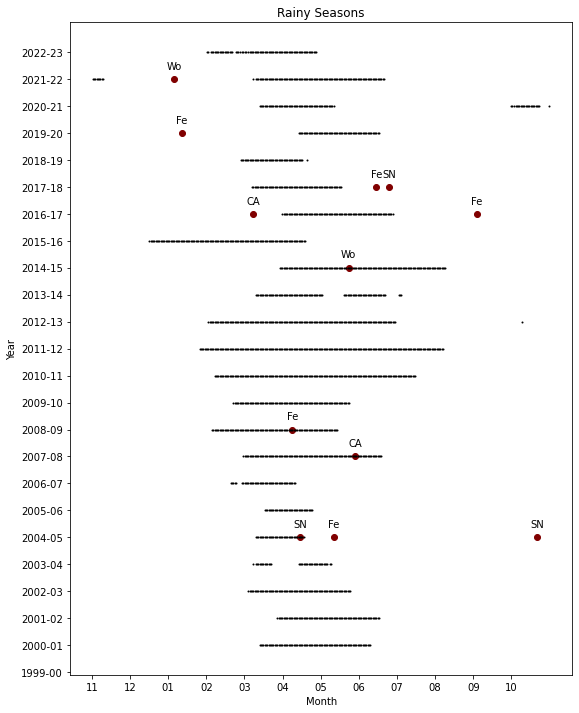

In [33]:
# Generates the rainy season plot
volcanos = {'Fernandina': 'Fe', 'Azul, Cerro': 'CA', 'Negra, Sierra': 'SN', 'Wolf': 'Wo'}

rolling_rain = average_galapagos.copy()
rain_start = '11-01'
rain_end = '10-31'
rolling_rain['roll90'] = average_galapagos.Precipitation.rolling(90).mean()
rolling_rain = rolling_rain.dropna()

plt.figure(figsize=(9,12))

erupt_dates = eruptions['Start'][eruptions['Start'] >= '2004-11-01']
decimal_erupts = np.array(erupt_dates.apply(date_to_decimal_year))
x = [((i + (2/12)) % 1) for i in decimal_erupts]
y = [(i + (2/12)) // 1 for i in decimal_erupts]
labels = list(eruptions['Volcano'][eruptions['Start'] >= '2004-11-01'])
plt.scatter(x, y, color='maroon')

for i in range(len(x)):
    plt.annotate(volcanos[labels[i]], (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

rain_by_year = []
for k in range(24):
        year = 2000 + k
        rain_by_year.append(rolling_rain[(rolling_rain['Date'] >= str(year) + '-' + rain_start) & (rolling_rain['Date'] <= str(year + 1) + '-' + rain_end)].roll90.sum()) 
mean_current = sum(rain_by_year[1:]) / (len(rain_by_year)-1)
mean_prev = sum(rain_by_year[0:-1]) / (len(rain_by_year)-1)
count = 0
for k in range(24):
        year = 2000 + k
        yearly_rain = rolling_rain[(rolling_rain['Date'] >= str(year) + '-' + rain_start) & (rolling_rain['Date'] <= str(year + 1) + '-' + rain_end)].sort_values(by=['roll90'])
        if k == 0:
            rainy_season = yearly_rain[-90:].sort_values(by=['Date'])
        else:
            #.15 and .10 add up to a .25 long rainy season, where we are scaling by how much stronger this year is than average. look back at ipad
            length = int((((rain_by_year[k] / mean_current) * .125) + ((rain_by_year[k-1] / mean_prev) * .125)) * 365)
            #length = int(.2*365)
            rainy_season = yearly_rain[-length:].sort_values(by=['Date'])
        rainy_array = np.array(rainy_season['Date'].apply(date_to_decimal_year))
        for i in np.array(erupt_dates):
            if i in np.array(rainy_season['Date']):
                count += 1
        x = []
        y = []
        for i in range(len(rainy_array)):
                year = (rainy_array[i] + 2/12) // 1
                month_day = (rainy_array[i] + 2/12) % 1
                if len(x) == 0:
                       x.append(month_day)
                       y.append(year)
                elif rainy_array[i] - rainy_array[i-1] <= .01:
                       if i == len(rainy_array) - 1:
                                plt.scatter(x, y, color='black', s=1)
                       else:
                                x.append(month_day)
                                y.append(year)   
                else:
                       plt.scatter(x, y, color='black', s=1)
                       x = [month_day]
                       y = [year]
print(count)
plt.yticks([2000+k for k in range(24)], [str(1999+k) + '-' + str(2000+k)[2:4] for k in range(24)])
plt.xticks([(1/12)*k for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])
plt.xlabel("Month") 
plt.ylabel("Year") 
plt.title('Rainy Seasons') 
plt.savefig('mixed_rain.png')
plt.show() 